# STAC Catalog for the Global Coherence Dataset

## 1. The Why

SpatioTemporal Asset Catalogs are an emerging standard for geospatial metadata. They are the de-facto standard for commercial SAR companies, and even CMR is working on a STAC interface. Since many of users are becoming accustomed to using STAC catalogs, ASF's Tools team has been building experience working with this technology. To that end, we have created a STAC catalog and STAC API for Dr. Joseph Kellendorfer's [Global Seasonal Sentinel-1 Interferometric Coherence and Backscatter Data Set](https://registry.opendata.aws/ebd-sentinel-1-global-coherence-backscatter/). This allows users to access this dataset in a whole new way!

## 2. STAC Browser

You can view our STAC catalog via [Radiant Earth's](https://radiant.earth) STAC Browser [website](https://radiantearth.github.io/stac-browser/#/external/stac.asf.alaska.edu/collections/sentinel-1-global-coherence?.language=en).

## 3. PySTAC Python Package

Alternatively, you can interact with our STAC API via the `PySTAC` package:

In [1]:
import pystac
import pystac_client
from datetime import datetime

client_url = 'https://stac.asf.alaska.edu/'
client = pystac_client.Client.open(client_url)

collection_id = 'sentinel-1-global-coherence'
collection = client.get_collection(collection_id)

In [2]:
collection

id: sentinel-1-global-coherence
title: Global Seasonal Sentinel-1 Interferometric Coherence and Backscatter Data Set
"description: This data set is the first-of-its-kind spatial representation of multi-seasonal, global C-band Synthetic Aperture Radar (SAR) interferometric repeat-pass coherence and backscatter signatures. Coverage comprises land masses and ice sheets from 82° Northern to 79° Southern latitudes. The data set is derived from multi-temporal repeat-pass interferometric processing of about 205,000 Sentinel-1 C-band SAR images acquired in Interferometric Wide-Swath Mode from 1-Dec-2019 to 30-Nov-2020. The data set encompasses three sets of seasonal (December-February, March-May, June-August, September-November) metrics produced with a pixel spacing of three arcseconds: 1) Median 6-, 12-, 18-, 24-, 36-, and 48-days repeat-pass coherence at VV or HH polarizations, 2) Mean radiometrically terrain corrected backscatter (γ0) at VV and VH, or HH and HV polarizations, and 3) Estimated parameters of an exponential coherence decay model. The data set has been produced to obtain global, spatially detailed information on how decorrelation affects interferometric measurements of surface displacement and is rich in spatial and temporal information for a variety of mapping applications."
type: Collection
"Data Citation: Kellndorfer, J. , O. Cartus, M. Lavalle, C. Magnard, P. Milillo, S. Oveisgharan, B. Osmanoglu, P. Rosen, and U. Wegmuller. 2022. Global seasonal Sentinel-1 interferometric coherence and backscatter data set. [Indicate subset used]. Fairbanks, Alaska USA. NASA Alaska Satellite Facility Synthetic Aperture Radar Distributed Active Archive Center. doi: https://doi.org/10.5067/8W33RRS6S2RV. [Date Accessed]."
"Literature Citation: Kellndorfer, J. , O. Cartus, M. Lavalle, C. Magnard, P. Milillo, S. Oveisgharan, B. Osmanoglu, P. Rosen, and U. Wegmuller. 2022. Global seasonal Sentinel-1 interferometric coherence and backscatter data set., Scientific Data. https://doi.org/10.1038/s41597-022-01189-6"
id: S78W161_fall_hh_tau
"bbox: [-161.0, -79.0, -160.0, -78.0]"
tile: S78W161
season: fall
datetime: 2020-10-16T00:00:00Z


In [3]:
bbox = [-85.8173, 43.7597, -85.1838, 44.2131]  # [min_lon, min_lat, max_lon, max_lat]
start_date = datetime(2020, 5, 1)
end_date = datetime(2020, 6, 1)
search = client.search(
    max_items=10,
    collections=['sentinel-1-global-coherence'],
    bbox=bbox,
    datetime=(start_date, end_date)
)
coh24 = [item for item in search.items() if 'COH24' in item.id][0]
coh24

id: N45W086_summer_vv_COH24
"bbox: [-86.0, 44.0, -85.0, 45.0]"
tile: N45W086
season: summer
datetime: 2020-07-16T12:00:00Z
end_datetime: 2020-08-31T00:00:00Z
start_datetime: 2020-06-01T00:00:00Z
sar:product_type: COH24
sar:polarizations: ['VV']
sar:frequency_band: C
sar:instrument_mode: IW


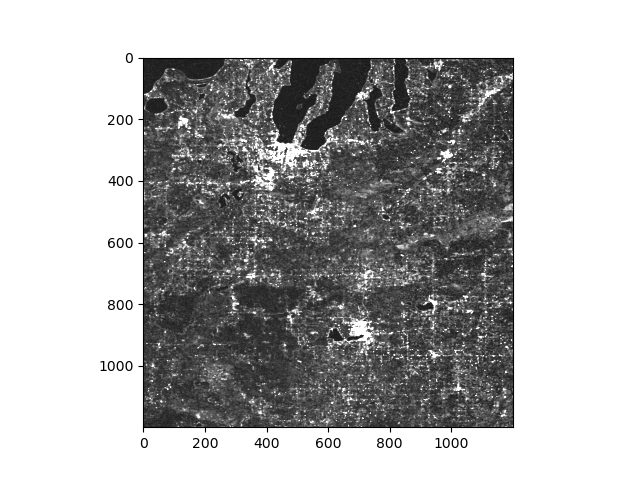

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np

ds = gdal.Open(coh24.assets['data'].href)
coh24_arr = np.ma.masked_equal(ds.GetRasterBand(1).ReadAsArray(), 0)

f, ax = plt.subplots(1,1)
ax.imshow(coh24_arr, vmin=0, vmax=25, cmap='Greys_r')